ยินดีด้วยครับที่คุณก้าวข้ามจากข้อมูลแบบ **Vector** (จุด, เส้น, พื้นที่) เข้าสู่โลกของ **Raster** ซึ่งเป็นหัวใจสำคัญของงานวิเคราะห์ภาพถ่ายดาวเทียมและข้อมูลเชิงพื้นที่แบบตารางครับ

---

## **17.1 บทนำสู่ Rasterio**

หาก GeoPandas คือราชาแห่งข้อมูล Vector... **Rasterio** ก็คือราชาแห่งข้อมูล **Raster** ในโลกของ Python ครับ มันถูกสร้างขึ้นมาเพื่อให้เราจัดการกับไฟล์ภาพถ่ายทางภูมิศาสตร์ (เช่น `.tif`) ได้ง่ายและรวดเร็ว โดยอาศัยความสามารถของโปรแกรมระดับตำนานอย่าง **GDAL** อยู่เบื้องหลัง

### **17.1.1 ข้อมูล Raster คืออะไร?**

ให้คุณนึกถึง **"รูปภาพ"** ครับ ข้อมูลแบบ Raster คือตารางที่ประกอบด้วยจุดเล็กๆ ที่เรียกว่า **Pixel (พิกเซล)** แต่ละพิกเซลจะเก็บ "ค่าตัวเลข" ที่แทนข้อมูลในโลกจริงไว้

**ตัวอย่างสิ่งที่เรามักเก็บในรูปแบบ Raster:**

* **Elevation (DEM):** แต่ละพิกเซลบอกความสูงของพื้นที่ (เช่น พิกเซลนี้สูง 500 เมตรจากระดับน้ำทะเล)
* **Satellite Imagery:** เก็บค่าการสะท้อนแสง (เช่น แบนด์สีแดง, เขียว, น้ำเงิน)
* **Climate Data:** แต่ละพิกเซลบอกอุณหภูมิหรือปริมาณน้ำฝน

**4 ลักษณะเด่นของ Raster:**

1. **Spatial Resolution (ความละเอียด):** พิกเซลหนึ่งกว้างกี่เมตรในโลกจริง? (เช่น 10m x 10m)
2. **Extent (ขอบเขต):** ภาพนี้ครอบคลุมพื้นที่จากไหนถึงไหน?
3. **CRS (ระบบพิกัด):** ตารางพิกเซลนี้วางอยู่ตรงไหนของแผนที่โลก?
4. **Bands (จำนวนชั้น):** ภาพมีกี่ชั้น? (เช่น ภาพถ่ายดาวเทียมอาจมี 10 ชั้นที่เก็บค่าแสงคนละช่วงคลื่น)

---

### **17.1.2 ทำไมต้องใช้ Rasterio?**

การใช้ Python เปิดภาพ `.jpg` ธรรมดานั้นทำได้ง่าย แต่ภาพดาวเทียมมักจะมีขนาด **ใหญ่มาก (หลาย GB)** และมี **พิกัด** ติดมาด้วย

* **ประหยัดแรม:** Rasterio สามารถ "ค่อยๆ อ่าน" ข้อมูลทีละส่วนได้ ไม่ต้องโหลดทั้งภาพเข้าแรม
* **ไม่ทำพิกัดหาย:** มันจะรักษาค่าละติจูด/ลองจิจูดของภาพไว้เสมอ
* **ทำงานร่วมกับ NumPy ได้ทันที:** ข้อมูลในพิกเซลจะถูกแปลงเป็น `numpy array` ทำให้เราคำนวณทางคณิตศาสตร์ได้ง่ายมาก

---

## **17.2 สิ่งที่คุณจะได้เรียนในบทนี้**

เมื่อจบเนื้อหาส่วนนี้ คุณจะสามารถ:

1. **อ่าน-เขียนไฟล์ Raster:** โดยที่พิกัดยังอยู่ครบถ้วน
2. **จัดการ Metadata:** ดูค่าทางสถิติและข้อมูลทางภูมิศาสตร์ของภาพ
3. **สร้างภาพ (Visualization):** ระบายสีภาพถ่ายดาวเทียมหรือข้อมูลความสูงให้สวยงาม
4. **Band Math:** คำนวณข้ามแบนด์ (เช่น การหาดัชนีความเขียวขจีของพืชพรรณ หรือ NDVI)

---



ก่อนจะเข้าสู่การประมวลผลภาพถ่ายดาวเทียมหรือข้อมูลความสูง ขั้นตอนแรกคือการเตรียมเครื่องมือให้พร้อมครับ ในโลกของ Python การจัดการ Raster ต้องอาศัยการทำงานร่วมกันของหลายห้องสมุด (Libraries) 5555 เพื่อให้ครอบคลุมทั้งการอ่านไฟล์ การคำนวณ และการแสดงผล

---

## **17.3 การติดตั้งและการเตรียมสภาพแวดล้อม**

### **การติดตั้ง**

หากคุณใช้งานบน Jupyter Notebook หรือ Google Colab ให้รันคำสั่งนี้เพื่อติดตั้ง Rasterio และเครื่องมือเสริมที่จำเป็น:

```python
# ติดตั้ง rasterio และ pygis (ซึ่งรวมเครื่องมือด้าน GIS ที่เป็นประโยชน์ไว้มากมาย)
%pip install rasterio pygis

```

---

### **การ Import และหน้าที่ของแต่ละ Library**

หัวใจสำคัญของการวิเคราะห์ Raster ไม่ได้มีแค่ Rasterio เพียงอย่างเดียว แต่ต้องใช้ "ทีมเวิร์ก" ดังนี้ครับ:

```python
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

```

* **`rasterio`**: ทำหน้าที่เป็น "ประตู" ในการเปิด-ปิด และอ่านค่าพิกัด/ข้อมูลภายในไฟล์ Raster (เช่น `.tif`, `.img`)
* **`rasterio.plot`**: ตัวช่วยพิเศษที่ทำให้การสั่งวาดภาพจากข้อมูลพิกัด Raster ทำได้ง่ายขึ้นมาก โดยไม่ต้องตั้งค่าเองเยอะ
* **`geopandas`**: แม้เราจะเน้น Raster แต่บ่อยครั้งเราต้องใช้ข้อมูล Vector (เช่น ขอบเขตจังหวัด) มาซ้อนทับหรือตัดภาพ (Clipping)
* **`numpy`**: **สำคัญมาก!** เพราะ Rasterio จะอ่านข้อมูลพิกเซลออกมาเป็น `numpy array` ทำให้เราสามารถคำนวณคณิตศาสตร์ได้รวดเร็วเหมือนการคำนวณตารางตัวเลข
* **`matplotlib`**: ใช้สำหรับสร้างกราฟ ปรับแต่งสีแผนที่ และจัดวาง Layout ของรูปภาพให้น่าสนใจ

---

### **ทำไมต้องทำงานร่วมกับ NumPy?**

เมื่อคุณเปิดไฟล์ภาพด้วย Rasterio ข้อมูลในแต่ละพิกเซลจะถูกมองเป็น "ตัวเลข" ในอาร์เรย์ของ NumPy ทันที

การแปลงภาพให้เป็นตัวเลขแบบนี้มีประโยชน์มหาศาลครับ เช่น:

* **Band Math**: การเอาพิกเซลจากแบนด์อินฟราเรดมาลบกับแบนด์สีแดง (เพื่อดูพื้นที่ป่าไม้)
* **Filtering**: การลดจุดรบกวนในภาพ
* **Reclassification**: การเปลี่ยนค่าพิกเซลจาก "ความสูง" ให้กลายเป็น "ระดับความเสี่ยงน้ำท่วม" (เช่น 1, 2, 3)

---



In [ ]:
# pip install rasterio geopandas pygis

In [2]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## **17.4 การอ่านข้อมูล Raster**

### **17.4.1 การเปิดไฟล์ด้วย `rasterio.open()**`

เมื่อคุณรันคำสั่ง `rasterio.open()` สิ่งที่ได้กลับมาคือวัตถุที่เรียกว่า **DatasetReader** ซึ่งเป็นเสมือน "บรรณารักษ์" ที่คอยคุมไฟล์ภาพนั้นอยู่

#### **ทำไมต้อง "เปิด" โดยไม่ "โหลด"?**

ลองนึกภาพไฟล์ภาพดาวเทียมที่มีขนาดหลายกิกะไบต์ (GB) หากโปรแกรมพยายามโหลดพิกเซลทั้งหมดเข้าหน่วยความจำ (RAM) พร้อมกัน คอมพิวเตอร์ของคุณอาจจะค้างได้ Rasterio จึงใช้วิธีเปิดไฟล์ไว้เฉยๆ เพื่อรอให้คุณสั่งว่า "จะดูข้อมูลส่วนไหน" หรือ "จะดูแค่สถิติเบื้องต้น" เท่านั้น

#### **ตัวอย่างการรันโค้ด:**

```python
# กำหนดที่อยู่ของไฟล์ (ในที่นี้คือไฟล์ความสูง DEM จาก GitHub)
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

# สร้างการเชื่อมต่อกับไฟล์
src = rasterio.open(raster_path)

# ลองพิมพ์ค่า src ออกมาดู
print(src)

```

**ผลลัพธ์ที่คุณจะเห็น:**
คุณจะเห็นข้อความทำนองว่า `<open DatasetReader name='...' mode='r'>` ซึ่งยืนยันว่าตอนนี้ Python เชื่อมต่อกับไฟล์ `.tif` เรียบร้อยแล้วในโหมด **Read (r)** หรือโหมดอ่านอย่างเดียว

---

### **สิ่งที่คุณทำได้หลังจากเปิด `src` (The Gateway)**

เมื่อคุณมีตัวแปร `src` แล้ว คุณสามารถทำสิ่งเหล่านี้ได้ทันทีโดยที่ยังไม่ต้องใช้แรมเยอะ:

1. **ส่องดู Metadata:** เช่น ภาพนี้กว้างกี่พิกเซล? ใช้ระบบพิกัดอะไร? (จะเรียนในหัวข้อถัดไป)
2. **อ่านเฉพาะบาง Band:** เช่น อ่านแค่แบนด์สีแดงแบนด์เดียว
3. **อ่านเฉพาะบางพื้นที่:** เช่น ตัดเฉพาะพิกเซลที่อยู่ในเขตกุรงเทพฯ ออกมาดู

> **ข้อแนะนำมือโปร:** เมื่อใช้งานเสร็จแล้ว ควรปิดการเชื่อมต่อด้วย `src.close()` หรือใช้คำสั่ง `with rasterio.open(raster_path) as src:` เพื่อให้ Python ปิดไฟล์ให้อัตโนมัติเมื่อทำงานเสร็จครับ



In [3]:
# กำหนดที่อยู่ของไฟล์ (ในที่นี้คือไฟล์ความสูง DEM จาก GitHub)
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

# สร้างการเชื่อมต่อกับไฟล์
src = rasterio.open(raster_path)

# ลองพิมพ์ค่า src ออกมาดู
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


หัวใจสำคัญของการทำงานกับข้อมูล Raster ไม่ใช่แค่การเห็นภาพ แต่คือการเข้าใจ **"ข้อมูลเบื้องหลัง" (Metadata)** ที่บอกว่าพิกเซลเหล่านั้นวางอยู่ตรงไหนของโลกและเก็บค่าอะไรไว้ครับ

---

## **17.4.2 การทำความเข้าใจ Metadata ของ Raster**

เมื่อคุณเปิดไฟล์ด้วย `src = rasterio.open()` คุณสามารถดึงข้อมูลคุณสมบัติต่างๆ ออกมาได้ดังนี้:

### **1. ข้อมูลพื้นฐาน (Basic Information)**

คุณสามารถใช้ `src.meta` เพื่อดูสรุปข้อมูลสำคัญทั้งหมด ซึ่งจะส่งค่ากลับมาเป็น **Dictionary** ที่รวมค่า Driver (ประเภทไฟล์), dtype (ชนิดข้อมูลตัวเลข), ขนาดภาพ และระบบพิกัดไว้ในที่เดียว

> **เกร็ดความรู้:** `dtype: int16` หมายความว่าพิกเซลนี้เก็บเลขจำนวนเต็มที่มีค่าได้ตั้งแต่ -32,768 ถึง 32,767 ซึ่งเหมาะมากสำหรับข้อมูลความสูง (DEM) ครับ

---

### **2. คุณสมบัติทางพื้นที่ (Spatial Properties)**

นี่คือสิ่งที่แยก "รูปภาพธรรมดา" ออกจาก "ข้อมูลภูมิสารสนเทศ":

* **CRS (Coordinate Reference System):** บอกว่าภาพนี้อ้างอิงกับพื้นโลกอย่างไร (จากตัวอย่างคือ **EPSG:3857** ซึ่งใช้หน่วยเป็นเมตร)
* **Spatial Resolution (`src.res`):** บอกขนาดของ 1 พิกเซล ในที่นี้คือ **90.0** หมายความว่า 1 พิกเซลในภาพเท่ากับพื้นที่ **90x90 เมตร** บนโลกจริง
* **Bounds:** ขอบเขตทิศเหนือ ใต้ ออก ตก ของภาพ ช่วยให้เรารู้ว่าภาพนี้ครอบคลุมพื้นที่ส่วนไหนบนแผนที่

---

### **17.4.3 Affine Transform: สะพานเชื่อมระหว่างพิกเซลกับโลก**

นี่คือส่วนที่ดูซับซ้อนที่สุดแต่สำคัญที่สุดครับ **Affine Transform** คือสูตรคณิตศาสตร์ที่ใช้เปลี่ยน "ตำแหน่งแถวและคอลัมน์" ในคอมพิวเตอร์ ให้กลายเป็น "พิกัดละติจูด/ลองจิจูด" บนโลกจริง

**พารามิเตอร์หลักที่ต้องรู้จัก:**

* **ค่า 90.00 (a):** ความกว้างพิกเซลแนวแกน X
* **ค่า -90.00 (e):** ความสูงพิกเซลแนวแกน Y (มักติดลบเพราะพิกัดภาพเริ่มจากบนลงล่าง แต่พิกัดโลกเริ่มจากล่างขึ้นบน)
* **ค่า -13442488.34 (c):** พิกัด X ของมุมบนซ้ายสุดของภาพ
* **ค่า 4668371.58 (f):** พิกัด Y ของมุมบนซ้ายสุดของภาพ

---

## **ตารางสรุป Metadata ที่ใช้บ่อย**

| คำสั่ง | สิ่งที่จะได้รับ | ประโยชน์ |
| --- | --- | --- |
| `src.count` | จำนวน Band | รู้ว่าภาพมีกี่ชั้น (เช่น RGB มี 3 แบนด์) |
| `src.width`, `src.height` | ขนาดพิกเซล | รู้ความละเอียดของไฟล์ภาพ |
| `src.dtypes` | ประเภทข้อมูล | ป้องกัน Error เวลาเอาไปคำนวณคณิตศาสตร์ |
| `src.crs` | ระบบพิกัด | ใช้ตรวจสอบเวลาจะเอาไปซ้อนกับข้อมูลอื่น |

---

**จุดที่น่าสังเกต:**
ในตัวอย่างนี้ ภาพมีขนาดใหญ่ถึง `4269 x 3113` พิกเซล แต่มีเพียง **1 Band** เท่านั้น เพราะมันเป็นข้อมูลความสูง (Digital Elevation Model) ซึ่งแต่ละจุดต้องการเพียงค่าเดียวคือ "ความสูงจากระดับน้ำทะเล" ครับ



In [4]:
print(f"File name: {src.name}")
print(f"File mode: {src.mode}")

File name: https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
File mode: r


In [5]:
print("Raster metadata:")
for key, value in src.meta.items():
    print(f"{key}: {value}")

Raster metadata:
driver: GTiff
dtype: int16
nodata: None
width: 4269
height: 3113
count: 1
crs: EPSG:3857
transform: | 90.00, 0.00,-13442488.34|
| 0.00,-90.00, 4668371.58|
| 0.00, 0.00, 1.00|


In [6]:
print(f"Coordinat Refernce System: {src.crs}")

Coordinat Refernce System: EPSG:3857


In [7]:
print(f"Pixel size (x, y): {src.res}")

Pixel size (x, y): (90.0, 89.99579177642138)


In [8]:
print(f"Raster dimensions: {src.width} x {src.height} pixels")

Raster dimensions: 4269 x 3113 pixels


In [9]:
print(f"Geographic bounds: {src.bounds}")

Geographic bounds: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)


In [11]:
print(f"Data types: {src.dtypes}")

Data types: ('int16',)


In [12]:
print(f"Number of bands: {src.count}")

Number of bands: 1


In [13]:
print("Affine transform:")
print(src.transform)

Affine transform:
| 90.00, 0.00,-13442488.34|
| 0.00,-90.00, 4668371.58|
| 0.00, 0.00, 1.00|


หัวข้อนี้จะเปลี่ยนจากตัวเลข Metadata ที่เราดูไปก่อนหน้า ให้กลายเป็นภาพที่สวยงามและสื่อสารข้อมูลได้ชัดเจนครับ การสร้างภาพ (Visualization) ใน Rasterio นั้นยืดหยุ่นมาก เพราะทำงานร่วมกับ Matplotlib ได้อย่างสมบูรณ์

---

## **17.5 การสร้างภาพข้อมูล Raster (Visualization)**

### **17.5.1 การวาดภาพพื้นฐาน**

วิธีที่ง่ายที่สุดคือการใช้ `rasterio.plot.show(src)` ซึ่งความเจ๋งของมันคือมันจะรักษา **พิกัดทางภูมิศาสตร์** (ละติจูด/ลองจิจูด) ไว้ที่แกนของรูปภาพให้โดยอัตโนมัติ





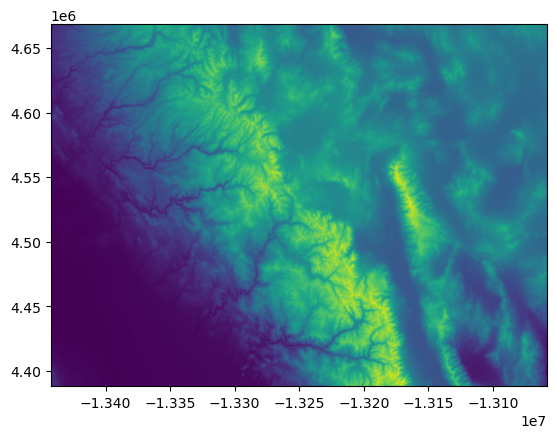

<Axes: >

In [14]:
rasterio.plot.show(src)


### **17.5.2 การใช้ Color Maps (ชุดสี)**

การเลือกสีมีผลต่อการตีความข้อมูลมากครับ:

* **'terrain'**: เหมาะกับข้อมูลความสูง (DEM) เพราะไล่สีจากเขียว (ที่ราบ) ไปน้ำตาล/ขาว (ยอดเขา)
* **'viridis'**: สียอดนิยมที่อ่านง่ายที่สุดสำหรับสายตาพืชพรรณหรืออุณหภูมิ
* **'gray'**: มาตรฐานสำหรับภาพขาวดำ หรือภาพทีละแบนด์ (Single Band)




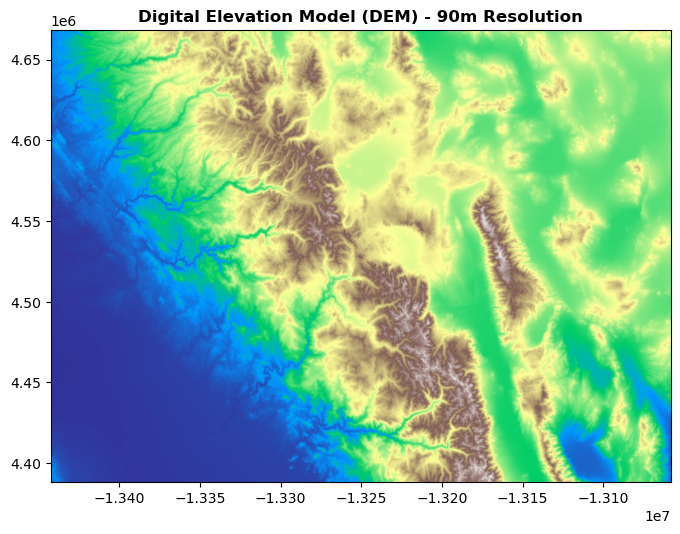

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(
    src,
    cmap="terrain",
    ax=ax,
    title="Digital Elevation Model (DEM) - 90m Resolution",
)
plt.show()

---

### **17.5.3 การใส่แถบสี (Colorbars)**

แผนที่ที่ไม่มีแถบสีจะบอกเราไม่ได้ว่า "สีแดงคือสูงกี่เมตร?" การเพิ่ม `plt.colorbar()` จะช่วยให้เราอ่านค่าพิกเซลจากสีได้ทันที

---

### **17.5.4 การจัดการภาพหลายแบนด์ (Multi-band Visualization)**

ภาพถ่ายดาวเทียม (เช่น Landsat 9) ไม่ได้มีแค่แบนด์เดียว เราสามารถเลือกดูได้หลายแบบ:

1. **Single Band**: ดูทีละชั้น เช่น ดูเฉพาะช่วงคลื่นอินฟราเรดเพื่อหาแหล่งน้ำ
2. **RGB Composite**: การนำแบนด์สีแดง (Red), เขียว (Green), และน้ำเงิน (Blue) มาซ้อนกันเพื่อให้ได้ภาพ **"สีจริง"** เหมือนที่ตาเห็น หรือผสมแบนด์อินฟราเรดเข้าไปเพื่อให้เห็นป่าไม้ชัดขึ้น (False Color)
3. **Multi-Panel Plot**: วาดทุกแบนด์เรียงกันเพื่อเปรียบเทียบว่าพืชพรรณหรือวัตถุต่างๆ สะท้อนแสงในแต่ละช่วงคลื่นต่างกันอย่างไร



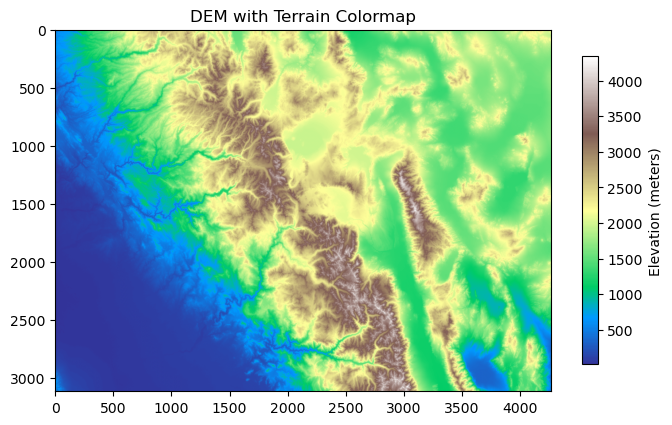

In [17]:
elevation_band = src.read(1)
plt.figure(figsize=(8,8))
plt.imshow(elevation_band, cmap='terrain')
plt.colorbar(
    label='Elevation (meters)',
    shrink=0.5
)
plt.title("DEM with Terrain Colormap")
plt.show()

---

### **17.5.5 การวางข้อมูล Vector ทับ Raster**

นี่คือหัวใจของการทำแผนที่ครับ! เช่น การเอาภาพถ่ายดาวเทียมมาวาง แล้วเอา **เส้นขอบเขตจังหวัด (Vector)** วางทับลงไป

* **ข้อควรระวัง:** ก่อนจะสั่ง `gdf.plot()` ทับลงบนภาพ `src` คุณต้องมั่นใจว่าทั้งคู่ใช้ **ระบบพิกัด (CRS) เดียวกัน** โดยใช้คำสั่ง `gdf.to_crs(src.crs)` ก่อนเสมอ

---

### **สรุปเทคนิคการวาดภาพ:**

* ใช้ `rasterio.plot.show()` เมื่อต้องการความเร็วและพิกัดที่ถูกต้อง
* ใช้ `plt.imshow()` เมื่อต้องการควบคุมรายละเอียดเชิงศิลปะหรือใส่ Colorbar แบบละเอียด
* จำไว้ว่า **"แบนด์ใน Rasterio เริ่มนับจาก 1"** (ไม่ใช่ 0 เหมือนใน Python list ทั่วไป)

In [19]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)

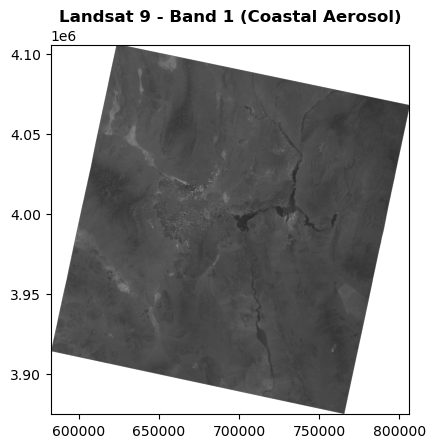

<Axes: title={'center': 'Landsat 9 - Band 1 (Coastal Aerosol)'}>

In [20]:
rasterio.plot.show(
    (src, 1),
    cmap="gray",
    title="Landsat 9 - Band 1 (Coastal Aerosol)",
)

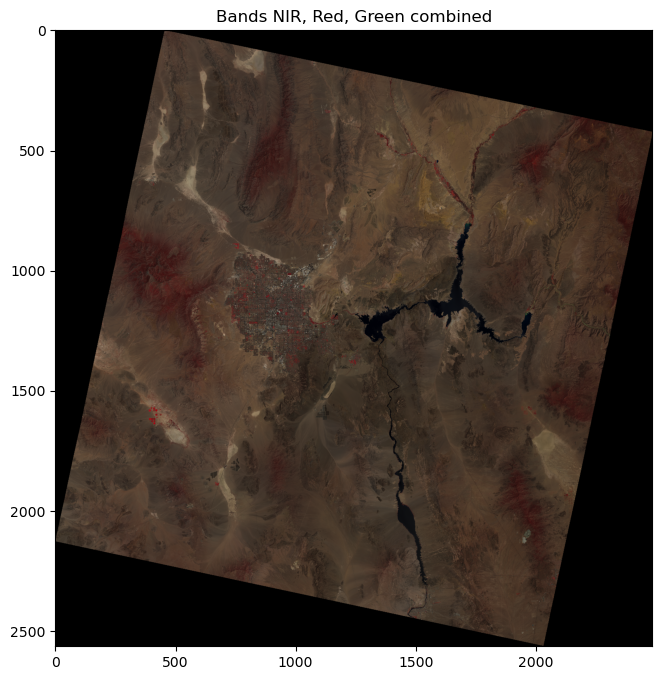

In [21]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0,1)

# Plot the stacked array
plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, Green combined")
plt.show()



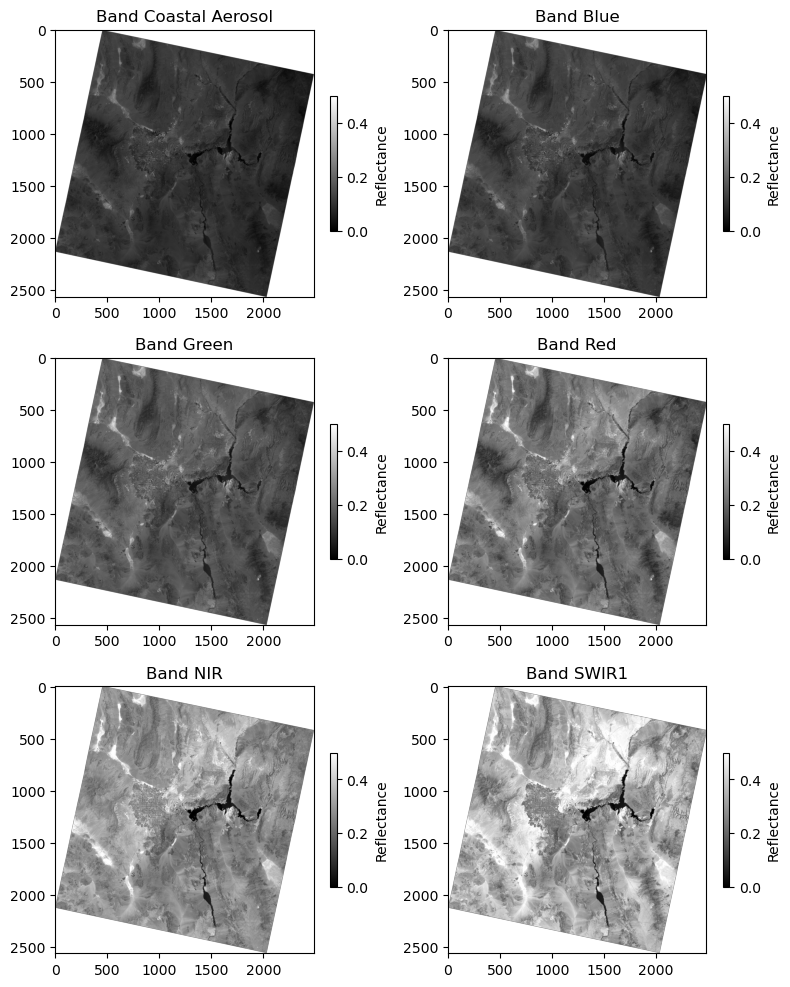

In [22]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten() # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
   data = src.read(band)
   ax = axes[band - 1]
   im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
   ax.set_title(f"Band {band_names[band - 1]}")
   fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)
   
plt.tight_layout()
plt.show()

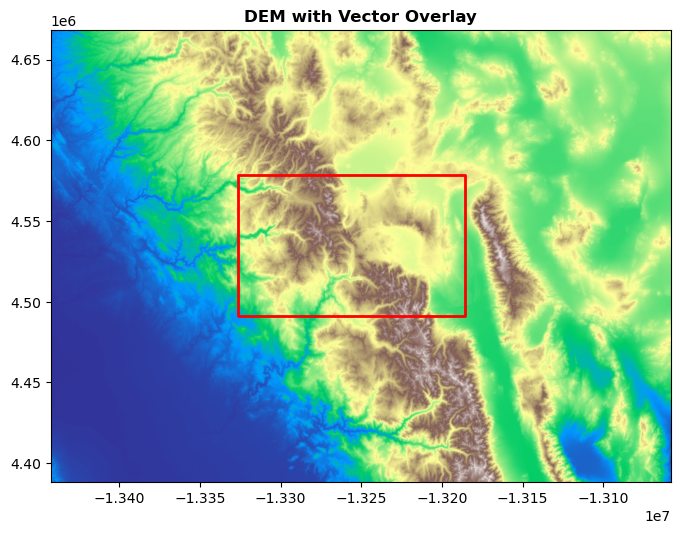

In [23]:
# Load raster data
raster_path = (
 "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
# Load vector data
vector_path = (
 "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)

gdf = gpd.read_file(vector_path)
gdf = gdf.to_crs(src.crs) # Ensure same CRS as raster

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="DEM with Vector Overlay")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2)
plt.show()